In [1]:
import matplotlib.pyplot as plt
import matplotlib
import os
import pandas as pd
import numpy as np
%matplotlib inline
matplotlib.style.use('ggplot')
import datetime
import locale
import time
locale.setlocale(locale.LC_TIME, 'es_ES.UTF-8')

'es_ES.UTF-8'

In [15]:
product = 'tomate'
tipo = 'production'
pwd = '/Volumes/Macintosh HD/_GitHub/journey-of-food/data/producto/'
aux = '/Volumes/Macintosh HD/_GitHub/journey-of-food/data/aux/'

In [16]:
products = os.listdir(pwd)[1:]

In [17]:
os.chdir(pwd+product+'/'+tipo)
files = os.listdir()
files

['exec13_6.27.3.xlsx',
 'exec13_6.27.4 (1).xlsx',
 'grafico.csv',
 'principal_provincia_peninsula.csv',
 'production_ready_INE.csv',
 'tomate.png',
 'total.csv',
 '~$exec13_6.27.4 (1).xlsx']

In [18]:
data = pd.read_excel('exec13_6.27.4 (1).xlsx',skiprows=[0,1,2,3,4,5,6], encoding ='utf-8')
data.fillna(0,inplace=True)

In [19]:
data.columns

Index(['Unnamed: 0', '(hectáreas)', '(toneladas)', '(hectáreas).1',
       '(toneladas).1', '(hectáreas).2', '(toneladas).2'],
      dtype='object')

In [20]:
data[data.columns[0]].head()

0      A Coruña
1          Lugo
2       Ourense
3    Pontevedra
4       GALICIA
Name: Unnamed: 0, dtype: object

In [21]:
dataClean = pd.DataFrame([data[data.columns[0]], data[data.columns[-1]]]).transpose()

In [22]:
dataClean.head()

,Unnamed: 0,(toneladas).2
0,A Coruña,576
1,Lugo,178
2,Ourense,300
3,Pontevedra,669
4,GALICIA,1723


In [23]:
data.head()

,Unnamed: 0,(hectáreas),(toneladas),(hectáreas).1,(toneladas).1,(hectáreas).2,(toneladas).2
0,A Coruña,121,1397,160,20875,7,576
1,Lugo,4,357,175,14816,2,178
2,Ourense,4,401,221,21929,3,300
3,Pontevedra,16,1254,376,29758,8,669
4,GALICIA,145,3409,932,87378,20,1723


In [24]:
data.columns = ['Provincia','S-ha_1-I a 31-V','P-t_1-I a 31-V','S-ha_1-VI a 30-IX','P-t_1-VI a 30-IX','S-ha_1-X a 31-XII','P-t_1-X a 31-XII']

In [25]:
data = data.loc[data.Provincia!=0]
data = data.loc[data['Provincia'] != ' GALICIA']
data = data.loc[data['Provincia'] != ' PAÍS VASCO']
data = data.loc[data['Provincia'] != ' ARAGÓN']
data = data.loc[data['Provincia'] != ' CATALUÑA']
data = data.loc[data['Provincia'] != ' CASTILLA Y LEÓN']
data = data.loc[data['Provincia'] != ' CASTILLA-LA MANCHA']
data = data.loc[data['Provincia'] != ' C. VALENCIANA']
data = data.loc[data['Provincia'] != ' EXTREMADURA']
data = data.loc[data['Provincia'] != ' ANDALUCÍA']
data = data.loc[data['Provincia'] != ' CANARIAS']
data = data.loc[data['Provincia'] != ' C. VALENCIANA']
data = data.loc[data['Provincia'] != 'ESPAÑA']
data = data.loc[data['Provincia'] != 'Las Palmas']
data = data.loc[data['Provincia'] != 'S.C. de Tenerife']

In [27]:
provincias = pd.read_csv(aux+'provincias.csv', delimiter='\t',index_col=1)

In [28]:
data.Provincia = data.Provincia.apply(lambda x: x.upper())

In [29]:
data['INE'] = data.Provincia.map(provincias.ID)

In [30]:
data.replace('–',0,inplace=True)

In [33]:
provincias_name = provincias = pd.read_csv(aux+'provincias_nombre.csv',index_col=1)

In [34]:
data.Provincia = data.INE.map(provincias_name.ID)

In [35]:
#data = data.loc[data.index<73]

In [37]:
data.loc[71] = ['Ceuta',0,0,0,0,0,0,0]
data.loc[72] = ['Melilla',0,0,0,0,0,0,0]
data

,Provincia,S-ha_1-I a 31-V,P-t_1-I a 31-V,S-ha_1-VI a 30-IX,P-t_1-VI a 30-IX,S-ha_1-X a 31-XII,P-t_1-X a 31-XII,INE
0,A Coruña,121,1397,160,20875,7,576,15
1,Lugo,4,357,175,14816,2,178,27
2,Ourense,4,401,221,21929,3,300,32
3,Pontevedra,16,1254,376,29758,8,669,36
6,Asturias,0,0,96,2360,0,0,33
8,Cantabria,0,0,16,324,0,0,39
10,Araba/Álava,1,50,54,1510,0,0,1
11,Gipuzkoa,5,286,66,1434,4,229,20
12,Bizkaia,0,0,164,4047,0,0,48
15,Navarra,0,0,2056,163305,0,0,31


In [38]:
data.to_csv(product+'_production_ready_INE.csv', encoding='utf-8')

In [46]:
dataMelt = pd.melt(data, id_vars='Provincia', value_vars=['S-ha_1-I a 31-V','P-t_1-I a 31-V','S-ha_1-VI a 30-IX','P-t_1-VI a 30-IX','S-ha_1-X a 31-XII','P-t_1-X a 31-XII'])

In [47]:
dataMelt['Unit'] = dataMelt['variable']
dataMelt['Unit'] = dataMelt['Unit'].apply(lambda x: x.split('_')[0])
dataMelt['variable'] = dataMelt['variable'].apply(lambda x: x.split('_')[1])

In [48]:
dataMelt.columns =['Provincia', 'Variable', 'Cantidad', 'Unit']

In [49]:
dataMelt['nonumeric'] = dataMelt.Cantidad.apply(lambda x: isinstance(x, int))

In [50]:
dataMelt = dataMelt.loc[dataMelt.nonumeric == True]

In [51]:
dataMelt.drop('nonumeric', axis=1, inplace=True)

In [52]:
dataMelt.head()

,Provincia,Variable,Cantidad,Unit
0,A Coruña,1-I a 31-V,121,S-ha
1,Lugo,1-I a 31-V,4,S-ha
2,Ourense,1-I a 31-V,4,S-ha
3,Pontevedra,1-I a 31-V,16,S-ha
4,Asturias,1-I a 31-V,0,S-ha


In [53]:
dataMelt.to_csv(product+'_production_ready_melt.csv', encoding='utf-8')

In [54]:
dataMelt['Cantidad'] = dataMelt['Cantidad'].astype('int')*1000.0

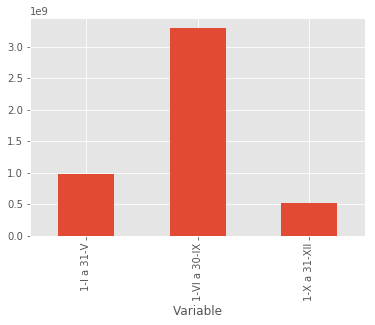

In [55]:
dataMelt.pivot_table(index='Variable', values='Cantidad', aggfunc='sum').Cantidad.plot('bar')

In [56]:
dataMelt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 0 to 299
Data columns (total 4 columns):
Provincia    300 non-null object
Variable     300 non-null object
Cantidad     300 non-null float64
Unit         300 non-null object
dtypes: float64(1), object(3)
memory usage: 11.7+ KB
